<img src="https://i.imgur.com/KD08gn5.png" width="700px" />


# 시험 성정 데이터

In [ ]:
# 데이터분석 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 딥러닝 라이브러리
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

<img src="https://i.imgur.com/1KzycmW.png" width="600px" />

In [ ]:
data = pd.DataFrame([[6, 4, 2, 75, 0, 3],
                     [7, 3, 1, 80, 0, 2],
                     [8, 2, 0, 85, 0, 2],
                     [9, 1, 1, 90, 1, 1],
                     [10,0, 2,100, 1, 0]], columns=['공부', '게임', 'TV', '성적', '합격여부', '등급'])

X = data[['공부', '게임', 'TV']]


# 1.활성함수 (activation)

```
- relu
- swish
- tanh
```

### relu

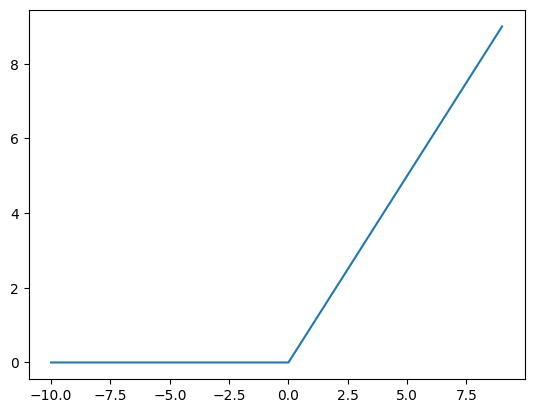

In [ ]:
x = tf.range(-10.0, 10.0)
y = layers.Activation('relu')( x )

plt.plot(x, y)

In [ ]:
# tf.print( layers.Activation('relu')(  5.0  ) )
# tf.print( layers.Activation('relu')(  0.0  ) )
tf.print( layers.Activation('relu')(  -5.0  ) )

0


실험

In [ ]:
tf.random.set_seed(2)

Y = data['성적']

model = models.Sequential()
model.add(layers.Dense(4))


x = tf.constant( [[9, 1, 1]] )
z = model.predict( x )
z

1/1 [==============================] - 0s 339ms/step


array([[-6.1796036, -1.6369209, -9.511881 ,  2.5082433]], dtype=float32)

In [ ]:
y = layers.Activation('relu')( z )

tf.print( y )

[[0 0 0 2.50824332]]


In [ ]:
tf.random.set_seed(2)

Y = data['성적']

model = models.Sequential()
model.add( layers.Dense(4) )
model.add( layers.Activation('relu') )


x = tf.constant( [[9, 1, 1]] )
z = model.predict( x )
z


1/1 [==============================] - 0s 170ms/step


array([[0.      , 2.687142, 0.      , 0.      ]], dtype=float32)

In [ ]:
tf.random.set_seed(2)

Y = data['성적']

model = models.Sequential()
model.add( layers.Dense(4, activation='relu') )


x = tf.constant( [[9, 1, 1]] )
model.predict( x )


1/1 [==============================] - 0s 149ms/step


array([[0.       , 0.       , 6.5755877, 4.3772364]], dtype=float32)

### sigmoid (출력 함수)

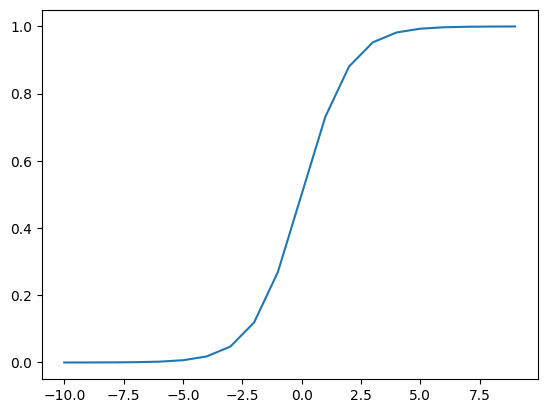

In [ ]:
x = tf.range(-10.0, 10.0)
y = layers.Activation('sigmoid')( x )

plt.plot(x, y)

In [ ]:
tf.print( layers.Activation('sigmoid')(  5.0  ) )
tf.print( layers.Activation('sigmoid')(  0.0  ) )
tf.print( layers.Activation('sigmoid')(  -5.0  ) )

0.993307173
0.5
0.00669285096


실험

In [ ]:
tf.random.set_seed(2)

Y = data['성적']

model = models.Sequential()
model.add(layers.Dense(1))


x = tf.constant( [[9, 1, 1]] )
z = model.predict( x )
z

1/1 [==============================] - 0s 492ms/step


array([[-8.3691435]], dtype=float32)

In [ ]:
y = layers.Activation('sigmoid')( z )
tf.print(y)

[[0.000231860351]]


In [ ]:
tf.random.set_seed(2)

Y = data['성적']

model = models.Sequential()
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))


x = tf.constant( [[9, 1, 1]] )
z = model.predict( x )
z


1/1 [==============================] - 0s 188ms/step


array([[0.99401593]], dtype=float32)

```
- sigmoid
- softmax
```

### softmax (출력 함수)

In [ ]:
x = tf.constant( [[8.0, 2.0, 1.0, 0.0],
                  [3.0, 5.0, 2.0, 0.0]] )

y = layers.Activation('softmax')(x)

tf.print( y )

[[0.996287823 0.00246955082 0.000908496906 0.00033421733]
 [0.113549612 0.839024484 0.0417725705 0.00565330265]]


In [ ]:
tf.random.set_seed(2)

Y = data['성적']

model = models.Sequential()
model.add(layers.Dense(4))


x = tf.constant( [[9, 1, 1]] )
z = model.predict( x )
z


1/1 [==============================] - 0s 97ms/step


array([[-3.1069846,  4.441734 ,  8.011556 , -8.041282 ]], dtype=float32)

In [ ]:
y = layers.Activation('softmax')(z)
tf.print( y )

[[1.44281985e-05 0.0273891576 0.972596288 1.03818302e-07]]


In [ ]:
tf.random.set_seed(2)

Y = data['성적']

model = models.Sequential()
model.add(layers.Dense(4))
model.add(layers.Activation('softmax'))


x = tf.constant( [[9, 1, 1]] )
z = model.predict( x )
z


1/1 [==============================] - 0s 88ms/step


array([[9.9977642e-01, 1.5202709e-04, 7.1235518e-05, 2.4440220e-07]],
      dtype=float32)

In [ ]:
np.argmax(z)

0

# 2.손실함수 (loss)

### MSE (mean squared error)

In [ ]:
y_true = [[10]]
y_pred = [[20]]

mse = tf.keras.losses.MeanSquaredError()
loss = mse(y_true, y_pred)

tf.print('Loss: ', loss) 


Loss:  100


In [ ]:
tf.random.set_seed(2)

Y = data['성적']

model = models.Sequential()
model.add(layers.Dense(1))


x = tf.constant( [[9, 1, 1]] )
z = model.predict( x )
z

1/1 [==============================] - 0s 81ms/step


array([[-2.474431]], dtype=float32)

In [ ]:
mse = tf.keras.losses.MeanSquaredError()
loss = mse([-8.545588], [85.0])   # 소수로 변경
tf.print('Loss: ', loss) 


Loss:  8750.77637


In [ ]:
tf.random.set_seed(2)

x = tf.constant( [[9, 1, 1]] )
y = tf.constant( [85] )

model = models.Sequential()
model.add(layers.Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(x, y)

1/1 [==============================] - 1s 508ms/step - loss: 6549.5400


에폭(epoch, 반복학습) 이해하기

In [ ]:
# 1000번 epoch
for i in range(0,10):   
  model.fit(x, y, verbose=0)


In [ ]:
tf.random.set_seed(2)

x = tf.constant( [[9, 1, 1]] )
y = tf.constant( [85] )

model = models.Sequential()
model.add(layers.Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(x, y, epochs=12, verbose=1)

Epoch 1/12
1/1 [==============================] - 1s 592ms/step - loss: 7668.4819
Epoch 2/12
1/1 [==============================] - 0s 12ms/step - loss: 7666.3804
Epoch 3/12
1/1 [==============================] - 0s 13ms/step - loss: 7664.2788
Epoch 4/12
1/1 [==============================] - 0s 11ms/step - loss: 7662.1777
Epoch 5/12
1/1 [==============================] - 0s 9ms/step - loss: 7660.0771
Epoch 6/12
1/1 [==============================] - 0s 10ms/step - loss: 7657.9766
Epoch 7/12
1/1 [==============================] - 0s 10ms/step - loss: 7655.8774
Epoch 8/12
1/1 [==============================] - 0s 10ms/step - loss: 7653.7773
Epoch 9/12
1/1 [==============================] - 0s 9ms/step - loss: 7651.6777
Epoch 10/12
1/1 [==============================] - 0s 9ms/step - loss: 7649.5786
Epoch 11/12
1/1 [==============================] - 0s 9ms/step - loss: 7647.4805
Epoch 12/12
1/1 [==============================] - 0s 9ms/step - loss: 7645.3818


### Cross Entropy

- 크로스 엔트로피는두 확률 분포의 차이를 구하기 위해서 사용된다.
- 딥러닝에서는 실제 데이터의 확률 분포와, 학습된 모델이 계산한 확률 분포의 차이를 구하는데 사용된다.
- 실제 확률분포는 원핫 인코딩으로 표현된다.

정답

```
Pr(Class A)  Pr(Class B)  Pr(Class C)
        1.0          0.0          0.0
```

머신 예측 확률

```
Pr(Class A)  Pr(Class B)  Pr(Class C)
      0.800        0.100        0.100
```

이 둘의 차이를 구하기 위해서 크로스 엔트로피를 쓰는데 계산식은 다음과 같다.

<img src="https://i.stack.imgur.com/gNip2.png" width="400px" />

```
H = - (1.0*ln(0.800) + 0.0*ln(0.100) + 0.0*ln(0.100)) = 0.479
```

```
H = - ln(0.800) = 0.479
```

<img src="https://portal.tpu.ru/SHARED/k/KONVAL/Sites/English_sites/Site3_M/img/log-exp1.png" width="200px" />
<img src="https://ljvmiranda921.github.io/assets/png/cs231n-ann/neg_log.png" width="400px" />

이렇게 계산된 값을 loss 값으로 사용하고, 이 loss 값을 줄이는 방향으로 학습모델을 training 한다.

In [ ]:
y_true = [[0, 1, 0],]
y_pred = [[0.05, 0.95, 0], ]


cce = tf.keras.losses.CategoricalCrossentropy()
cce(y_true, y_pred).numpy()

0.051293306

In [ ]:
-np.log(0.95)

0.05129329438755058

<img src="https://i.imgur.com/1KzycmW.png" width="600px" />

In [ ]:
tf.random.set_seed(2)

x = tf.constant( [[9, 1, 1]] )
y = tf.constant( [1] )


model = models.Sequential()
model.add(layers.Dense(4, activation='softmax'))


x = tf.constant( [[9, 1, 1]] )
z = model.predict( x )
z

1/1 [==============================] - 0s 96ms/step


array([[0.00318611, 0.0455032 , 0.928005  , 0.02330572]], dtype=float32)

In [ ]:
y_true = [[0, 1, 0, 0],]
y_pred = [[1.5621261e-03, 1.8312974e-02, 9.7937793e-01, 7.4698235e-04]]


cce = tf.keras.losses.CategoricalCrossentropy()
cce(y_true, y_pred).numpy()



4.0001454

In [ ]:
-np.log(1.8312974e-02)

4.000145508580791

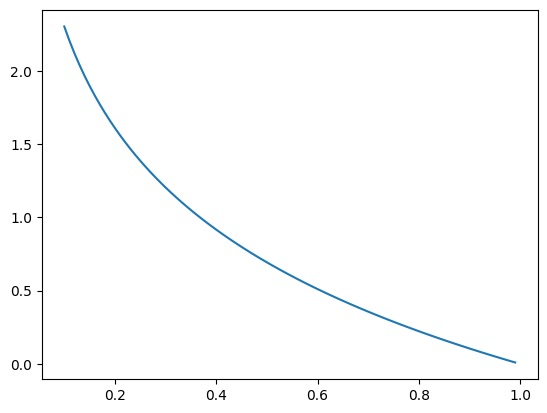

In [ ]:
x = tf.range(0.1, 1.0, 0.01)
y = -np.log(x)
plt.plot(x, y)
plt.show()